In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score 
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression

In [104]:
df=pd.read_csv('Maxcap_train.csv')
df_test=pd.read_csv('Maxcap_test.csv')

In [105]:
x_train=df[['cycle','meanV','meanI','meanT']]
#x_train=df[['cycle','meanV']]

y_train=df['maxcap']
x_test=df_test[['cycle','meanV','meanI','meanT']]
#x_test=df_test[['cycle','meanV']]

y_test=df_test['maxcap']

In [106]:
def correct(y):
    for i in range(len(y)):
        if(y[i]>100):
            y[i]=100
        if(y[i]<0):
            y[i]=0
    return y
    

In [107]:
def evaluate(model):
    #model.fit(x_train,y_train)
    p_train=model.predict(x_train)
    p_test=model.predict(x_test)
    p_test=p_test.reshape(-1)
    p_test=correct(p_test)
    p_train=p_train.reshape(-1)
    p_train=correct(p_train)
    print("Training data")
    print('r2:',"%.2f"%r2_score(p_train,y_train))
    per=np.sqrt(mse(p_train,y_train))
    print("Mean Error :","%.2f"%per)
    print("Max Error:","%.2f"%max(np.abs(y_train-p_train)))
    
    print("\nTest data")
    print('r2:',"%.2f"%r2_score(p_test,y_test))
    per=np.sqrt(mse(p_test,y_test))/100
    print("Mean Error  :","%.2f"%per)
    print("Max Error:","%.2f"%max(np.abs(y_test-p_test)))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Train data plot')
 
    ax1.scatter(y_train,p_train)
    ax1.plot([0,1],[0,1], transform=ax1.transAxes)
    ax2.set_title('Test data plot')

    ax2.scatter(y_test,p_test)
    ax2.plot([0,1],[0,1], transform=ax2.transAxes)
    plt.show()

In [108]:
x_train

,cycle,meanV,meanI,meanT
0,10.0,3.122082,2.685971,32.398035
1,11.0,3.117410,2.670149,32.347859
2,12.0,3.119771,2.677731,32.292283
3,13.0,3.113153,2.697176,32.253605
4,14.0,3.119159,2.666390,32.313815
...,...,...,...,...
4444,699.0,3.076217,2.554513,32.712370
4445,700.0,2.994252,2.396890,32.442615
4446,701.0,2.973596,2.352294,32.495816
4447,702.0,2.999863,2.365055,32.398418


In [109]:
x_test

,cycle,meanV,meanI,meanT
0,10.0,3.123066,2.560892,31.987980
1,11.0,3.125962,2.615394,32.029985
2,12.0,3.123039,2.615390,32.072339
3,13.0,3.122536,2.606776,32.062292
4,14.0,3.129108,2.617113,32.031822
...,...,...,...,...
1748,871.0,3.033633,2.542227,30.114897
1749,872.0,3.034351,2.546643,30.112802
1750,873.0,3.040200,2.551430,30.084579
1751,874.0,3.036886,2.548588,30.260962


In [ ]:
sav

In [110]:
def pr(a,b):
    return pd.DataFrame(a.values*b.values)

In [111]:
c=x_train[['cycle']]
v=x_train[['meanV']]
i=x_train[['meanI']]
t=x_train[['meanT']]
x_new=pd.concat([i,t,c,v,pr(c,v),pr(c**2,v),pr(c,v**2)],axis=1)


In [112]:
c=x_test[['cycle']]
v=x_test[['meanV']]
i=x_test[['meanI']]
t=x_test[['meanT']]
x_newt=pd.concat([i,t,c,v,pr(c,v),pr(c**2,v),pr(c,v**2)],axis=1)

Train RMS error 0.01
Train Max error  0.07
Test Max error  0.09
Train RMS error 0.02


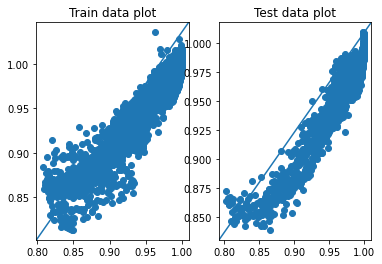

In [123]:
lr=LinearRegression()
lr.fit(x_new,y_train)
p_train=lr.predict(x_new)
p_test=lr.predict(x_newt)
max_err_train=max(np.abs(y_test-p_test))
max_err_test= max(np.abs(y_train-p_train))
print("Train RMS error","%.2f"%np.sqrt(mse(y_train,p_train)))
print("Train Max error ","%.2f"%max_err_train)
print("Test Max error ","%.2f"%max_err_test)
print("Train RMS error","%.2f"%np.sqrt(mse(y_test,p_test)))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Train data plot')

ax1.scatter(y_train,p_train)
ax1.plot([0,1],[0,1], transform=ax1.transAxes)
ax2.set_title('Test data plot')

ax2.scatter(y_test,p_test)
ax2.plot([0,1],[0,1], transform=ax2.transAxes)
plt.show()

<BarContainer object of 7 artists>

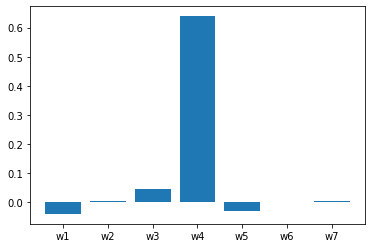

In [120]:
w=[]
for i in range(1,8):
    w.append('w'+str(i))
plt.bar(w,lr.coef_)

In [121]:
lr.coef_

array([-4.02411054e-02,  3.11738127e-03,  4.46369398e-02,  6.38861175e-01,
       -2.99954579e-02,  4.78113037e-08,  5.01282536e-03])

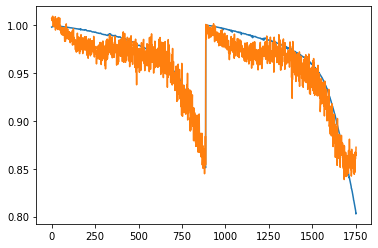

In [115]:
plt.plot(y_test)
plt.plot(lr.predict(x_newt))

In [116]:
lr.coef_

array([-4.02411054e-02,  3.11738127e-03,  4.46369398e-02,  6.38861175e-01,
       -2.99954579e-02,  4.78113037e-08,  5.01282536e-03])

## Random Forest

Training data
r2: 1.00
Mean Error : 0.00
Max Error: 0.03

Test data
r2: 0.72
Mean Error  : 0.00
Max Error: 0.08


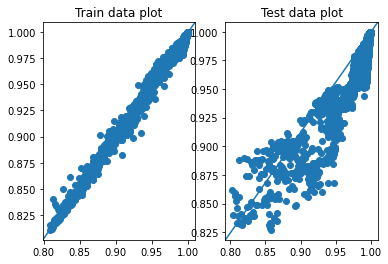

In [78]:
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
evaluate(rf)

In [79]:
i

,meanI
0,2.560892
1,2.615394
2,2.615390
3,2.606776
4,2.617113
...,...
1748,2.542227
1749,2.546643
1750,2.551430
1751,2.548588


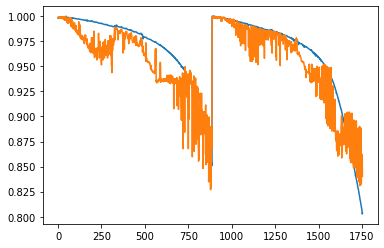

In [80]:
plt.plot(y_test)
plt.plot(rf.predict(x_test))